### Predicción de Noticias

In [1]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

#### Lectura de Datos

In [2]:
with open("../dataset/data.pkl", "rb") as file:
    df = pickle.load(file)

In [3]:
def porcentajeNulos(df, umbral):
    # Calcula el porcentaje de nulos por columna

    porcentajeNulos = df.isna().sum().sort_values(ascending=False) / len(df)
    # Filtra las columnas que superan el umbral
    columnas = porcentajeNulos[(porcentajeNulos >= umbral)]

    # Muestra el resultado
    if not columnas.empty:
        print("Columnas con mas del {}% de valores nulos:".format(umbral * 100))
        print(columnas)
        
    else :
        print("No hay columnas con mas del {}% de valores nulos.".format(umbral * 100))

porcentajeNulos(df, umbral=0)

Columnas con mas del 0% de valores nulos:
content    0.0
label      0.0
dtype: float64


In [4]:
X = df["content"]
y = df["label"]

In [5]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)


# Se utiliza TfidfVectorizer de scikit-learn para convertir el texto en una representación numérica basada en TF-IDF, 
# tanto para los datos de entrenamiento como para los de prueba, lo que permite utilizar algoritmos de aprendizaje automático con datos de texto.


#este objeto "vector" contiene los parámetros y métodos necesarios para convertir texto en una matriz numérica basada en TF-IDF
vector = TfidfVectorizer()

x_train = vector.fit_transform(X_train)
x_test = vector.transform(X_test)


## Regresion Logistica

In [6]:
modelo = LogisticRegression()
modelo.fit(x_train,y_train)

# Predecir en el conjunto de evaluación
y_pred = modelo.predict(x_test)

#### Matriz de confusión

In [7]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[5093,  152],
       [  74, 6276]], dtype=int64)

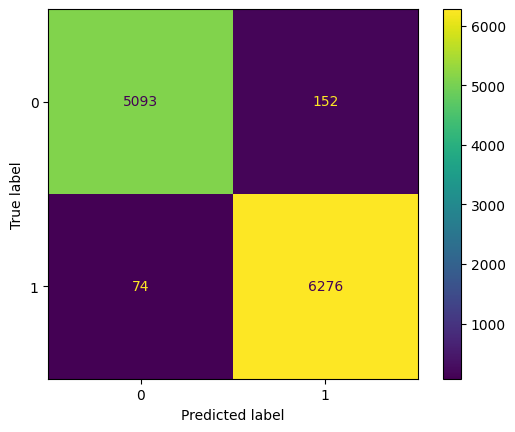

In [8]:
cm_display = ConfusionMatrixDisplay(matrix)
cm_display.plot()
plt.show()

#### Exactitud

In [9]:
# Comparamos los valores q me dio mi modelo y_pred vs valores reales de prueba y_test

# Evaluar en el conjunto de evaluación
print('El score del modelo es:', accuracy_score(y_test, y_pred))

El score del modelo es: 0.9805088400172488


#### Precisión

In [10]:
print(precision_score(y_test, y_pred, average= None))

[0.98567834 0.97635345]


#### Sensibilidad

In [11]:
### Exhaustividad/Recall/Sensibilidad

print(recall_score(y_test, y_pred, average= None))

[0.97102002 0.98834646]


#### Especificidad

In [12]:
# Calcula la precisión para la clase negativa (clase 0)
specificity = precision_score(y_test, y_pred, pos_label=0)
print("Especificidad:", specificity)

Especificidad: 0.9856783433326882


- Por los valores tan cercanos a 1 se podría decir que ¿el modelo esta sobre-entrenando? está sobre-entrenado  cuando en el conjunto de entrenamiento lo hace bien pero en el conjunto de evaluación no.

- Un modelo es bueno cuando tanto pára el conjunto de entrenamiento como para el conjunto de evaluación tiene unas buenas métricas.

- Que este cerca a uno es que distingue muy bien una clase de la otra.

In [13]:
# Predecir y evaluar en el conjunto de entrenamiento

y_pred_train = modelo.predict(x_train)
print('El score del modelo es:', accuracy_score(y_train, y_pred_train))

El score del modelo es: 0.9851766967322194


In [14]:
### **`Precisión`**

print(precision_score(y_train, y_pred_train, average= None))

[0.98971552 0.98152718]


#### Curvas ROC

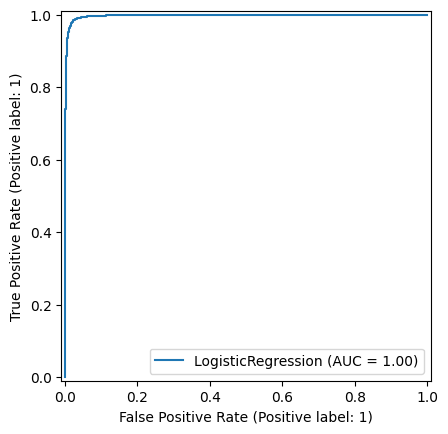

In [15]:
RocCurveDisplay.from_estimator(modelo, x_test, y_test)

##  Árbol de decisión

In [63]:
modelo = DecisionTreeClassifier(max_depth = 2, criterion='entropy', min_samples_split=2 , min_samples_leaf=1)
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

In [64]:
print(modelo.score(x_test, y_test))

0.8710651142733937


In [65]:
### **Exactitud**
print('El score del modelo es:', accuracy_score(y_test, y_pred))

El score del modelo es: 0.8710651142733937


In [66]:
### **`Precisión`**

precision = precision_score(y_test, y_pred, average= None)
print(precision)

[0.84041394 0.89880072]


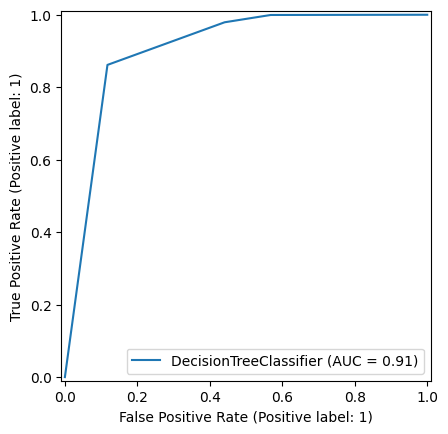

In [67]:
RocCurveDisplay.from_estimator(modelo, x_test, y_test)

## Random Forest Classifier

In [20]:
modelo = RandomForestClassifier()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

In [21]:
### **Exactitud**

print('El score del modelo es:', accuracy_score(y_test, y_pred))

El score del modelo es: 0.9668822768434671


In [22]:
### **`Precisión`**

precision = precision_score(y_test, y_pred, average= None)
print(precision)

[0.97535693 0.96019747]


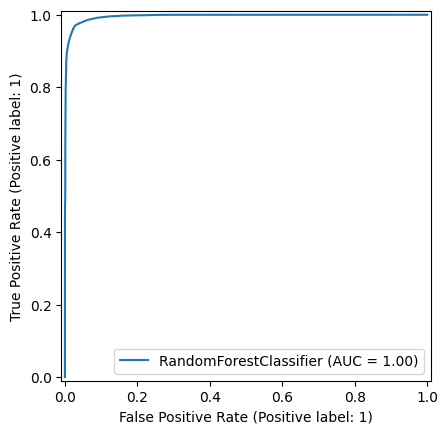

In [23]:
RocCurveDisplay.from_estimator(modelo, x_test, y_test)